# Demographic Data Analysis with Python

The International Data Base (IDB, 2022) contains the demographic data of over 200
countries. The demographic data contains the total population by age and sex.

The goal of this project is to descriptively analyse and determine the relationship between
variables using the demographic data ```census2002_2022.csv``` extracted from the
International Data Base (IDB, 2022). This dataset contains life expectancy at birth and
under 5 mortality rates of 227 countries across 5 regions and 21 subregions for 2002 and
2022. **The life expectancy infers the average number of years a group of people who
born in the same year is expected to live if the mortality remains same at all ages in the
future**. On the other hand, **under-5 mortality rates refer to the number
of children who die before age 5 for every 1000 births**. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datapackage
import geopandas as gpd
#from plotnine import ggplot, aes, geom_histogram
#from plotnine.ggplot import ggplot

In [69]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress Plotnine warnings
warnings.filterwarnings('ignore')


In [3]:
pd.__version__

'2.1.2'

In [2]:
sns.__version__

'0.13.0'

In [2]:
# Load the dataset
demographic = pd.read_csv("census2002_2022.csv")

# Check the first few rows
print(demographic.head())

   Unnamed: 0 Country.Area.Name           Subregion  Region  Year  \
0           1       Afghanistan  South-Central Asia    Asia  2002   
1           2       Afghanistan  South-Central Asia    Asia  2022   
2           3           Albania     Southern Europe  Europe  2002   
3           4           Albania     Southern Europe  Europe  2022   
4           5           Algeria     Northern Africa  Africa  2002   

   Life.Expectancy.at.Birth..Both.Sexes  Life.Expectancy.at.Birth..Males  \
0                                 46.10                            45.11   
1                                 53.65                            52.10   
2                                 75.44                            72.79   
3                                 79.47                            76.80   
4                                 72.99                            72.06   

   Life.Expectancy.at.Birth..Females  Under.Age.5.Mortality..Both.Sexes  \
0                              47.15                 

## Description of the dataset

The dataset ```census2002_2022.csv``` is used in this project and is a small portion of
the International Data Base (IDB, 2022). IDB contains the demographic data of all
the regions and sub-regions recognized by U.S. Census Bureau. The data of this enormous
database is collected through different procedures such as censuses, surveys, and
estimates and projections by the U.S. Census Bureau from 1950s.

The ```census2002_2022.csv``` dataset contains demographic information for 227 countries
across 21 subregions and 5 regions: Asia, Africa, Americas, Europe, and Oceania for
the years 2002 and 2022. The dataset includes life expectancy at birth and under age 5
mortality rates of these countries for males, females, and both sexes. The whole dataset
contains a total of 454 observations and 10 variables with an index X. There are six
continuous variables: $\textsf{Life Expectancy at Birth Both Sexes}$, $\textsf{Life Expectancy at Birth
Males}$, $\textsf{Life Expectancy at Birth Females}$, $\textsf{Under Age 5 Mortality Both Sexes}$, $\textsf{Under Age
5 Mortality Males}$, and $\textsf{Under Age 5 Mortality Females}$, as well as 4 categorical variables:
$\textsf{Country.Area.Name}$, $\textsf{Subregion}$, $\textsf{Region}$, and $\textsf{Year}$. Numerical variables in this report
consist of whole numbers or decimal values defined with 1 or 2 decimal points.

In our given dataset, there is a total of 44 missing values that are replaced by NA. There
exist 36 continuous missing values from six different countries: Libya, Puerto Rico, South
Sudan, Sudan, Syria, and United States for 2002, as well as 8 categorical values for 2002
and 2022. The six countries that are mentioned are not used in the comparison between
the variable values of 2002 and 2022 in task four. Overall, the data quality is better for
analysis in 2022 as only 4 categorical missing values are there compared to 40 missing
values in 2002.

In [4]:
# Handle missing values
numeric_columns = demographic.select_dtypes(include=['number']).columns
demographic[numeric_columns] = demographic.groupby(['Region', 'Subregion'])[numeric_columns].transform(
    lambda x: x.fillna(x.mean())
)


In [5]:
# Check for remaining missing values
print(demographic.isna().sum())

Unnamed: 0                              0
Country.Area.Name                       0
Subregion                               0
Region                                  0
Year                                    0
Life.Expectancy.at.Birth..Both.Sexes    0
Life.Expectancy.at.Birth..Males         0
Life.Expectancy.at.Birth..Females       0
Under.Age.5.Mortality..Both.Sexes       0
Under.Age.5.Mortality..Males            0
Under.Age.5.Mortality..Females          0
dtype: int64


## Descriptive Analysis of the 2022 Data

In [14]:
# Filter the data for 2022
Census_2022 = demographic[demographic['Year'] == 2022]

In [28]:
# # Create histograms with seaborn for males
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Under.Age.5.Mortality..Males', bins=20, kde=True, color='lightgreen')
# plt.xlabel('U5 mortality rates of males')
# plt.ylabel('Density')
# plt.title('Frequency distribution of Mortality rate of males in 2022')
# plt.show()

In [29]:
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Life.Expectancy.at.Birth..Males', bins=20, kde=True, color='#00BFC4')
# plt.xlabel('L.E at birth of males')
# plt.ylabel('Density')
# plt.title('Frequency distribution of life expectancy of males in 2022')
# plt.show()

In [30]:
# # Create histograms with seaborn for females
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Under.Age.5.Mortality..Females', bins=20, kde=True, color='lightgreen')
# plt.xlabel('U5 mortality rates of females')
# plt.ylabel('Density')
# plt.title('Frequency distribution of Mortality rate of females in 2022')
# plt.show()

In [31]:
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Life.Expectancy.at.Birth..Females', bins=20, kde=True, color='#00BFC4')
# plt.xlabel('L.E at birth of females')
# plt.ylabel('Density')
# plt.title('Frequency distribution of life expectancy of females in 2022')
# plt.show()

In [32]:
# # Create histograms with seaborn
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Under.Age.5.Mortality..Both.Sexes', bins=20, kde=True, color='lightgreen')
# plt.xlabel('U5 mortality rates of both sexes')
# plt.ylabel('Density')
# plt.title('Frequency distribution of Mortality rate of both sexes in 2022')
# plt.show()

In [33]:
# plt.figure(figsize=(10, 5))
# sns.histplot(data=Census_2022, x='Life.Expectancy.at.Birth..Both.Sexes', bins=20, kde=True, color='#00BFC4')
# plt.xlabel('L.E at birth of both sexes')
# plt.ylabel ('Density')
# plt.title('Frequency distribution of life expectancy of both sexes in 2022')
# plt.show()

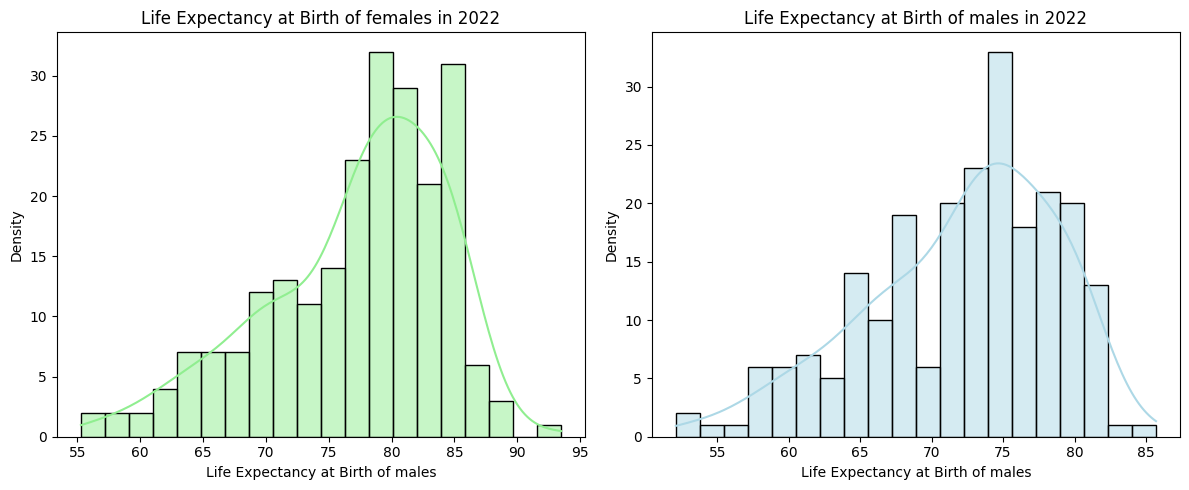

In [9]:
# Create subplots for comparison
plt.figure(figsize=(12, 5))

# Subplot for Life Expectancy at Birth of females
plt.subplot(1, 2, 1)
sns.histplot(data=Census_2022, x='Life.Expectancy.at.Birth..Females', bins=20, kde=True, color='lightgreen')
plt.xlabel('Life Expectancy at Birth of males')
plt.ylabel('Density')
plt.title('Life Expectancy at Birth of females in 2022')

# Subplot for Life Expectancy at Birth of males
plt.subplot(1, 2, 2)
sns.histplot(data=Census_2022, x='Life.Expectancy.at.Birth..Males', bins=20, kde=True, color='lightblue')
plt.xlabel('Life Expectancy at Birth of males')
plt.ylabel('Density')
plt.title('Life Expectancy at Birth of males in 2022')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


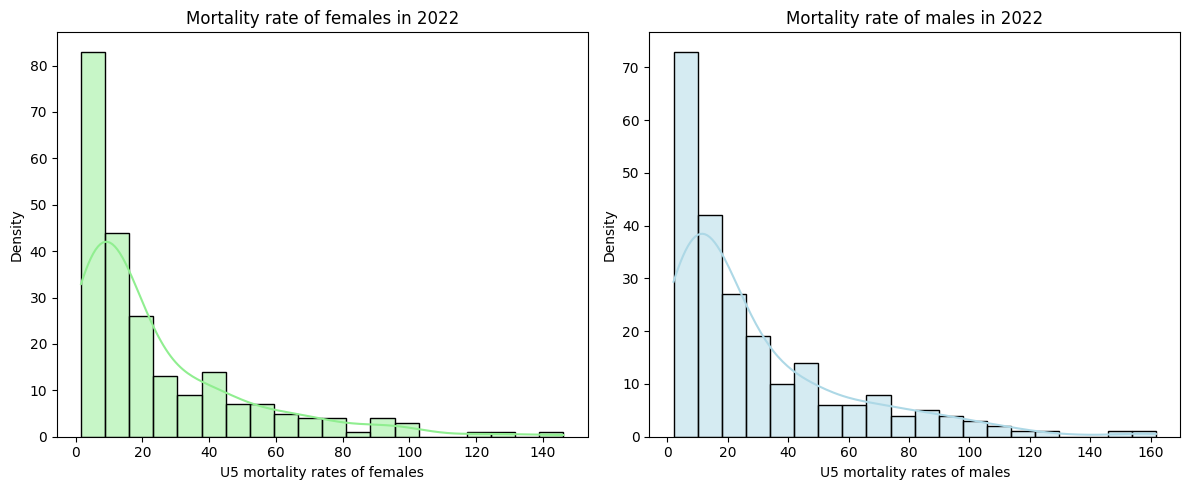

In [10]:
# Create subplots for comparison
plt.figure(figsize=(12, 5))

# Subplot for U5 mortality rates of females
plt.subplot(1, 2, 1)
sns.histplot(data=Census_2022, x='Under.Age.5.Mortality..Females', bins=20, kde=True, color='lightgreen')
plt.xlabel('U5 mortality rates of females')
plt.ylabel('Density')
plt.title('Mortality rate of females in 2022')

# Subplot for U5 mortality rates of males
plt.subplot(1, 2, 2)
sns.histplot(data=Census_2022, x='Under.Age.5.Mortality..Males', bins=20, kde=True, color='lightblue')
plt.xlabel('U5 mortality rates of males')
plt.ylabel('Density')
plt.title('Mortality rate of males in 2022')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


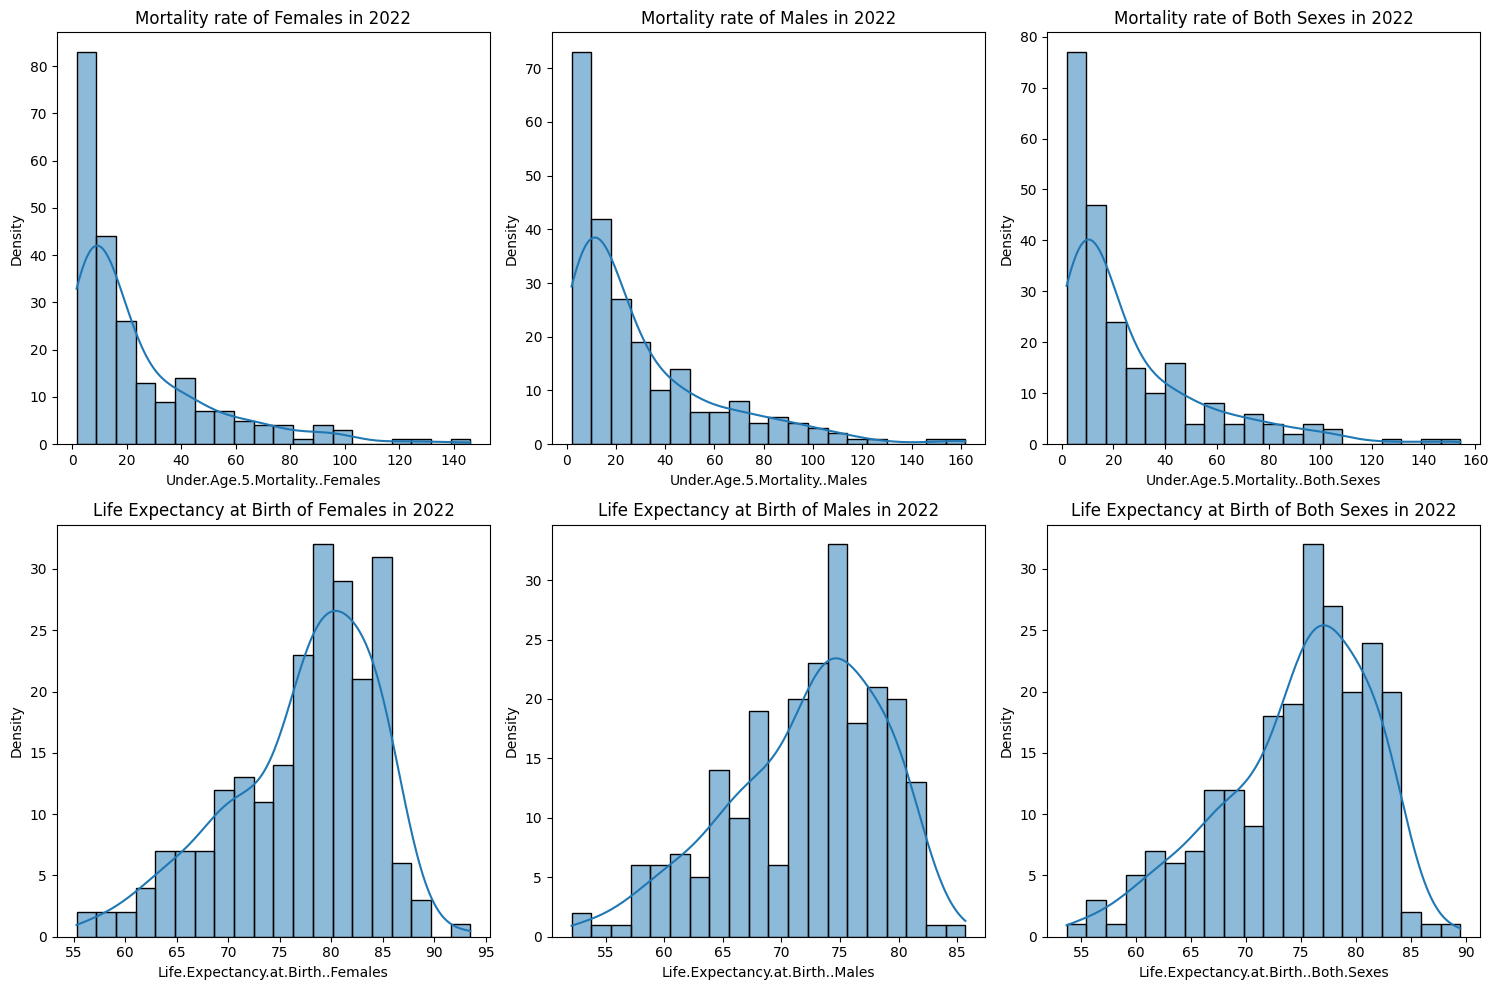

In [15]:
# Create subplots for comparison All Together
plt.figure(figsize=(15, 10))

variables = [
    'Under.Age.5.Mortality..Females',
    'Under.Age.5.Mortality..Males',
    'Under.Age.5.Mortality..Both.Sexes',
    'Life.Expectancy.at.Birth..Females',
    'Life.Expectancy.at.Birth..Males',
    'Life.Expectancy.at.Birth..Both.Sexes',
]

titles = [
    'Mortality rate of Females in 2022',
    'Mortality rate of Males in 2022',
    'Mortality rate of Both Sexes in 2022',
    'Life Expectancy at Birth of Females in 2022',
    'Life Expectancy at Birth of Males in 2022',
    'Life Expectancy at Birth of Both Sexes in 2022',
]

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data=Census_2022, x=var, bins=20, kde=True)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(titles[i-1])

plt.tight_layout()
plt.show()


In [16]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

In [18]:
data = pd.read_csv('census2002_2022.csv')

In [19]:
data.head(10)

Unnamed: 0 Country.Area.Name           Subregion   Region  Year  \
0           1       Afghanistan  South-Central Asia     Asia  2002   
1           2       Afghanistan  South-Central Asia     Asia  2022   
2           3           Albania     Southern Europe   Europe  2002   
3           4           Albania     Southern Europe   Europe  2022   
4           5           Algeria     Northern Africa   Africa  2002   
5           6           Algeria     Northern Africa   Africa  2022   
6           7    American Samoa           Polynesia  Oceania  2002   
7           8    American Samoa           Polynesia  Oceania  2022   
8           9           Andorra     Southern Europe   Europe  2002   
9          10           Andorra     Southern Europe   Europe  2022   

   Life.Expectancy.at.Birth..Both.Sexes  Life.Expectancy.at.Birth..Males  \
0                                 46.10                            45.11   
1                                 53.65                            52.10   
2                                 75.44                            72.79   
3                                 79.47                            76.80   
4                                 72.99                            72.06   
5                                 78.03                            76.57   
6                                 69.92                            68.38   
7                                 75.32                            72.83   
8                                 82.36                            80.40   
9                                 83.42                            81.20   

   Life.Expectancy.at.Birth..Females  Under.Age.5.Mortality..Both.Sexes  \
0                              47.15                             213.89   
1                              55.28                             154.13   
2                              78.43                              24.09   
3                              82.33                              12.66   
4                              73.97                              40.53   
5                              79.57                              22.85   
6                              71.55                              18.69   
7                              77.97                              12.69   
8                              84.35                               4.78   
9                              85.79                               4.13   

   Under.Age.5.Mortality..Males  Under.Age.5.Mortality..Females  
0                        220.44                          207.00  
1                        161.78                          146.09  
2                         25.41                           22.61  
3                         13.71                           11.53  
4                         42.87                           38.08  
5                         24.40                           21.21  
6                         20.57                           16.68  
7                         14.80                           10.45  
8                          4.47                            5.09  
9                          4.22                            4.03

In [20]:
world = gpd.read_file('countries.geojson')

In [21]:
world.head()

ADMIN ISO_A3 ISO_A2  \
0        Aruba    ABW     AW   
1  Afghanistan    AFG     AF   
2       Angola    AGO     AO   
3     Anguilla    AIA     AI   
4      Albania    ALB     AL   

                                            geometry  
0  MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...  
1  MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...  
2  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...  
3  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...  
4  MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...

In [22]:
merged_data = world.merge(data, left_on='ADMIN', right_on='Country.Area.Name', how='inner')

In [34]:
# fig = px.choropleth(merged_data, 
#                     locations='ISO_A3',  # Use a unique identifier for each country
#                     color='Under.Age.5.Mortality..Males',
#                     hover_name='Country.Area.Name',  # Show the region name on hover
#                     title='Life Expectancy by Country')

# # Customize the appearance of the map
# fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
# fig.update_layout(geo=dict(lataxis_showgrid=True, lonaxis_showgrid=True))

# fig.show()

In [23]:
fig = px.choropleth(merged_data, 
                    locations='ISO_A3',  # Use a unique identifier for each country
                    color='Under.Age.5.Mortality..Both.Sexes',
                    #hover_name='Country.Area.Name',  # Show the region name on hover
                    hover_name=merged_data['Country.Area.Name'] + ' - ' + merged_data['Region'],
                    title='Under Age 5 Mortality Rates by Country')

# Customize the appearance of the map
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(lataxis_showgrid=True, lonaxis_showgrid=True))

fig.show()

In [24]:
fig = px.choropleth(merged_data, 
                    locations='ISO_A3',  # Use a unique identifier for each country
                    color='Life.Expectancy.at.Birth..Both.Sexes',
                    #hover_name='Country.Area.Name',  # Show the region name on hover
                    hover_name=merged_data['Country.Area.Name'] + ' - ' + merged_data['Region'],
                    title='Life Expectancy by Country')

# Customize the appearance of the map
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(lataxis_showgrid=True, lonaxis_showgrid=True))

fig.show()

In [25]:
# Summary statistics for variables
mortality_rate_males_22 = Census_2022['Under.Age.5.Mortality..Males']
print(mortality_rate_males_22.describe())
print(mortality_rate_males_22.std())

count    227.000000
mean      29.234141
std       30.086499
min        2.030000
25%        8.320000
50%       17.550000
75%       41.025000
max      161.780000
Name: Under.Age.5.Mortality..Males, dtype: float64
30.08649927340688


In [26]:
mortality_rate_females_22 = Census_2022['Under.Age.5.Mortality..Females']
print(mortality_rate_females_22.describe())
print(mortality_rate_females_22.std())


count    227.000000
mean      24.011982
std       26.140073
min        1.640000
25%        6.345000
50%       13.620000
75%       34.470000
max      146.090000
Name: Under.Age.5.Mortality..Females, dtype: float64
26.14007310928912


## Homogeneity and Heterogeneity between Subregions using Boxplots

In [186]:
# # Set the style
# sns.set(style="whitegrid")

# # Life Expectancy at Birth of Males
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Life.Expectancy.at.Birth..Males', y='Region', data=Census_2022, palette='viridis')
# sns.stripplot(x='Life.Expectancy.at.Birth..Males', y='Region', data=Census_2022, color=".25", size=4)
# plt.xlabel('Life Expectancy at Birth of Males')
# plt.ylabel('Region')
# plt.title('Life Expectancy at Birth of Males by Region')
# plt.xlim(50, 100)
# plt.show()

# # Under 5 Mortality Rates of Males
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Under.Age.5.Mortality..Males', y='Region', data=Census_2022, palette='viridis')
# sns.stripplot(x='Under.Age.5.Mortality..Males', y='Region', data=Census_2022, color=".25", size=4)
# plt.xlabel('Under 5 Mortality Rates of Males')
# plt.ylabel('Region')
# plt.title('Under 5 Mortality Rates of Males by Region')
# plt.xlim(0, 155)
# plt.show()


In [187]:
# # Set the style
# sns.set(style="whitegrid")

# # Life Expectancy at Birth of Both Sexes
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Life.Expectancy.at.Birth..Both.Sexes', y='Region', data=Census_2022, palette='viridis')
# sns.stripplot(x='Life.Expectancy.at.Birth..Both.Sexes', y='Region', data=Census_2022, color=".25", size=4)
# plt.xlabel('Life Expectancy at Birth of Both Sexes in 2022')
# plt.ylabel('Region')
# plt.title('Life Expectancy at Birth of Both Sexes by Region')
# plt.xlim(50, 100)
# plt.show()

# # Under 5 Mortality Rates of Both Sexes
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Under.Age.5.Mortality..Both.Sexes', y='Region', data=Census_2022, palette='viridis')
# sns.stripplot(x='Under.Age.5.Mortality..Both.Sexes', y='Region', data=Census_2022, color=".25", size=4)
# plt.xlabel('Under 5 Mortality Rates of Both Sexes in 2022')
# plt.ylabel('Region')
# plt.title('Under 5 Mortality Rates of Both Sexes by Region')
# plt.xlim(0, 155)
# plt.show()


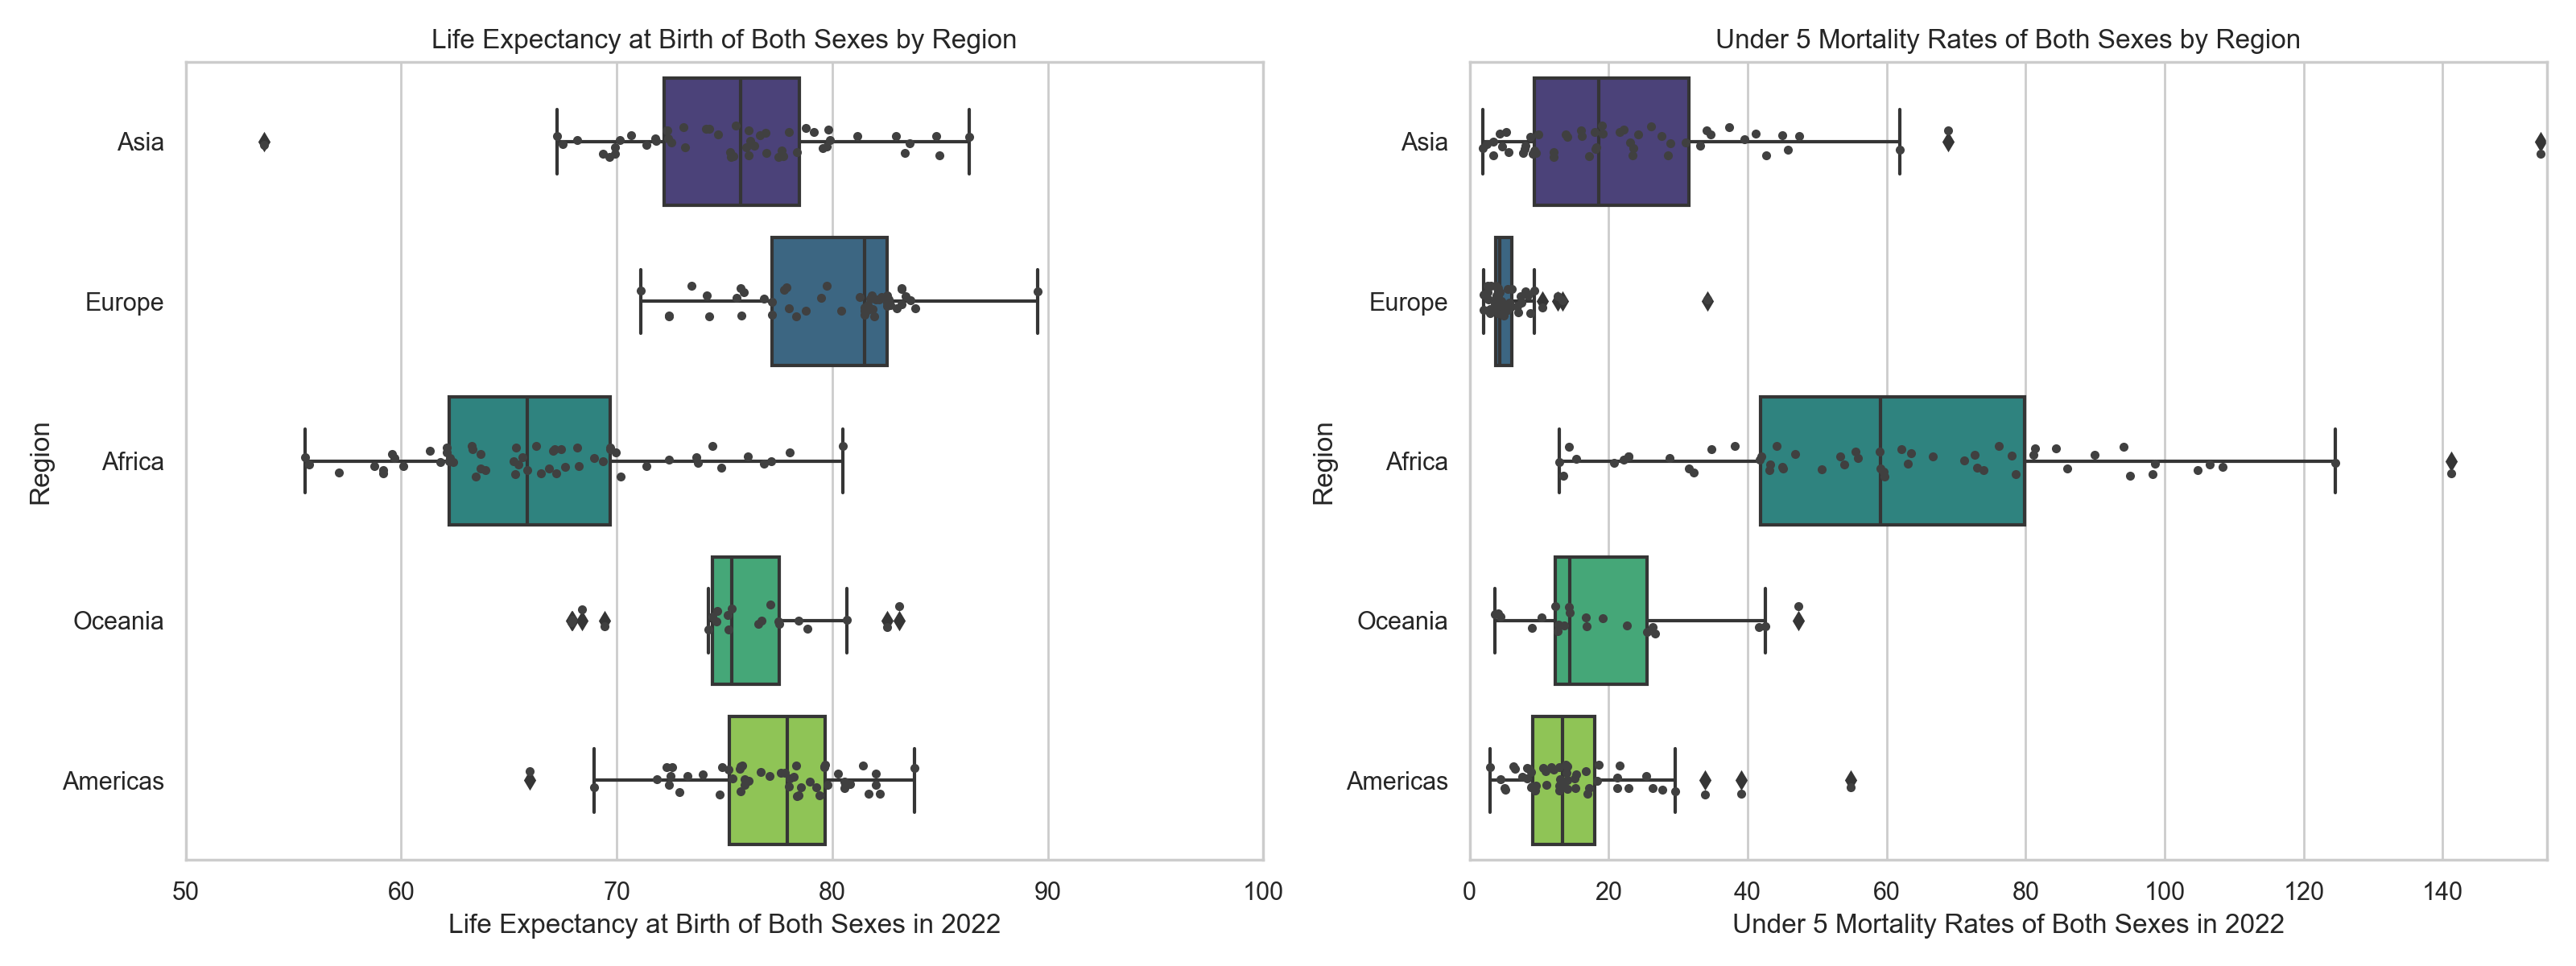

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Life Expectancy at Birth of Both Sexes
sns.boxplot(
    x='Life.Expectancy.at.Birth..Both.Sexes',
    y='Region',
    data=Census_2022,
    palette='viridis',
    ax=axes[0]
)
sns.stripplot(
    x='Life.Expectancy.at.Birth..Both.Sexes',
    y='Region',
    data=Census_2022,
    color=".25",
    size=4,
    ax=axes[0]
)
axes[0].set_xlabel('Life Expectancy at Birth of Both Sexes in 2022')
axes[0].set_ylabel('Region')
axes[0].set_title('Life Expectancy at Birth of Both Sexes by Region')
axes[0].set_xlim(50, 100)

# Under 5 Mortality Rates of Both Sexes
sns.boxplot(
    x='Under.Age.5.Mortality..Both.Sexes',
    y='Region',
    data=Census_2022,
    palette='viridis',
    ax=axes[1]
)
sns.stripplot(
    x='Under.Age.5.Mortality..Both.Sexes',
    y='Region',
    data=Census_2022,
    color=".25",
    size=4,
    ax=axes[1]
)
axes[1].set_xlabel('Under 5 Mortality Rates of Both Sexes in 2022')
axes[1].set_ylabel('Region')
axes[1].set_title('Under 5 Mortality Rates of Both Sexes by Region')
axes[1].set_xlim(0, 155)

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
from plotnine import *

# Subset data for Africa region
Census_2022_africa = Census_2022[Census_2022['Region'] == 'Africa']

# Convert Subregion to factor with ordered levels
Census_2022_africa.loc[:, 'Subregion'] = pd.Categorical(Census_2022_africa['Subregion'], ordered=True)


# Life Expectancy at Birth of Both Sexes
box_both_sexes = (
    ggplot(data=Census_2022_africa, mapping=aes(x='Life.Expectancy.at.Birth..Both.Sexes', y='Subregion')) +
    geom_point(mapping=aes(color='Region'), alpha=0.5) +
    geom_boxplot(mapping=aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
    xlab("L.E at birth of both sexes") +
    ylab("Subregions") +
    xlim(50, 90) +
    theme(
        axis_title_x=element_text(color="Black", size=14, face="bold"),
        axis_title_y=element_text(color="Black", size=12, face="bold"),
        axis_text=element_text(size=10),
        legend_title=element_text(size=12, face="bold"),
        legend_text=element_text(size=10),
        legend_position="none"
    )
)


# # Life Expectancy at Birth of Males
# box_males = (
#     ggplot(data=Census_2022_africa, mapping = aes(x='Life.Expectancy.at.Birth..Males', y='Subregion')) +
#     geom_point(mapping = aes(color='Region'), alpha=0.5) +
#     geom_boxplot(aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
#     xlab("L.E at birth of males") +
#     ylab("Subregions") +
#     xlim(50, 90) +
#     theme(
#         axis_title_x=element_text(color="Black", size=14, face="bold"),
#         axis_title_y=element_text(color="Black", size=12, face="bold"),
#         axis_text=element_text(size=10),
#         legend_title=element_text(size=12, face="bold"),
#         legend_text=element_text(size=10),
#         legend_position="none"
#     )
# )

# # Life Expectancy at Birth of Females
# box_females = (
#     ggplot(data=Census_2022_africa, mapping = aes(x='Life.Expectancy.at.Birth..Females', y='Subregion')) +
#     geom_point(mapping = aes(color='Region'), alpha=0.5) +
#     geom_boxplot(aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
#     xlab("L.E at birth of females") +
#     ylab("Subregions") +
#     xlim(50, 90) +
#     theme(
#         axis_title_x=element_text(color="Black", size=14, face="bold"),
#         axis_title_y=element_text(color="Black", size=12, face="bold"),
#         axis_text=element_text(size=10),
#         legend_title=element_text(size=12, face="bold"),
#         legend_text=element_text(size=10),
#         legend_position="none"
#     )
# )

# Mortality Rate of Both Sexes
box_mortality = (
    ggplot(data=Census_2022_africa, mapping = aes(x='Under.Age.5.Mortality..Both.Sexes', y='Subregion')) +
    geom_point(mapping = aes(color='Region'), alpha=0.5) +
    geom_boxplot(aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
    xlab("U5 mortality rates of both sexes") +
    ylab("Subregions") +
    xlim(10, 160) +
    theme(
        axis_title_x=element_text(color="Black", size=14, face="bold"),
        axis_title_y=element_text(color="Black", size=12, face="bold"),
        axis_text=element_text(size=10),
        legend_title=element_text(size=12, face="bold"),
        legend_text=element_text(size=10),
        legend_position="none"
    )
)

# # Mortality Rate of Males Under 5
# box_males_u5 = (
#     ggplot(data=Census_2022_africa, mapping = aes(x='Under.Age.5.Mortality..Males', y='Subregion')) +
#     geom_point(mapping = aes(color='Region'), alpha=0.5) +
#     geom_boxplot(aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
#     xlab("U5 mortality rates of males") +
#     ylab("Subregions") +
#     xlim(10, 160) +
#     theme(
#         axis_title_x=element_text(color="Black", size=14, face="bold"),
#         axis_title_y=element_text(color="Black", size=12, face="bold"),
#         axis_text=element_text(size=10),
#         legend_title=element_text(size=12, face="bold"),
#         legend_text=element_text(size=10),
#         legend_position="none"
#     )
# )

# # Mortality Rate of Females Under 5
# box_females_u5 = (
#     ggplot(data=Census_2022_africa, mapping = aes(x='Under.Age.5.Mortality..Females', y='Subregion')) +
#     geom_point(mapping = aes(color='Region'), alpha=0.5) +
#     geom_boxplot(aes(fill='Region'), alpha=0.6, size=0.7, outlier_color="Black") +
#     xlab("U5 mortality rates of Females") +
#     ylab("Subregions") +
#     xlim(10, 160) +
#     theme(
#         axis_title_x=element_text(color="Black", size=14, face="bold"),
#         axis_title_y=element_text(color="Black", size=12, face="bold"),
#         axis_text=element_text(size=10),
#         legend_title=element_text(size=12, face="bold"),
#         legend_text=element_text(size=10),
#         legend_position="none"
#     )
# )

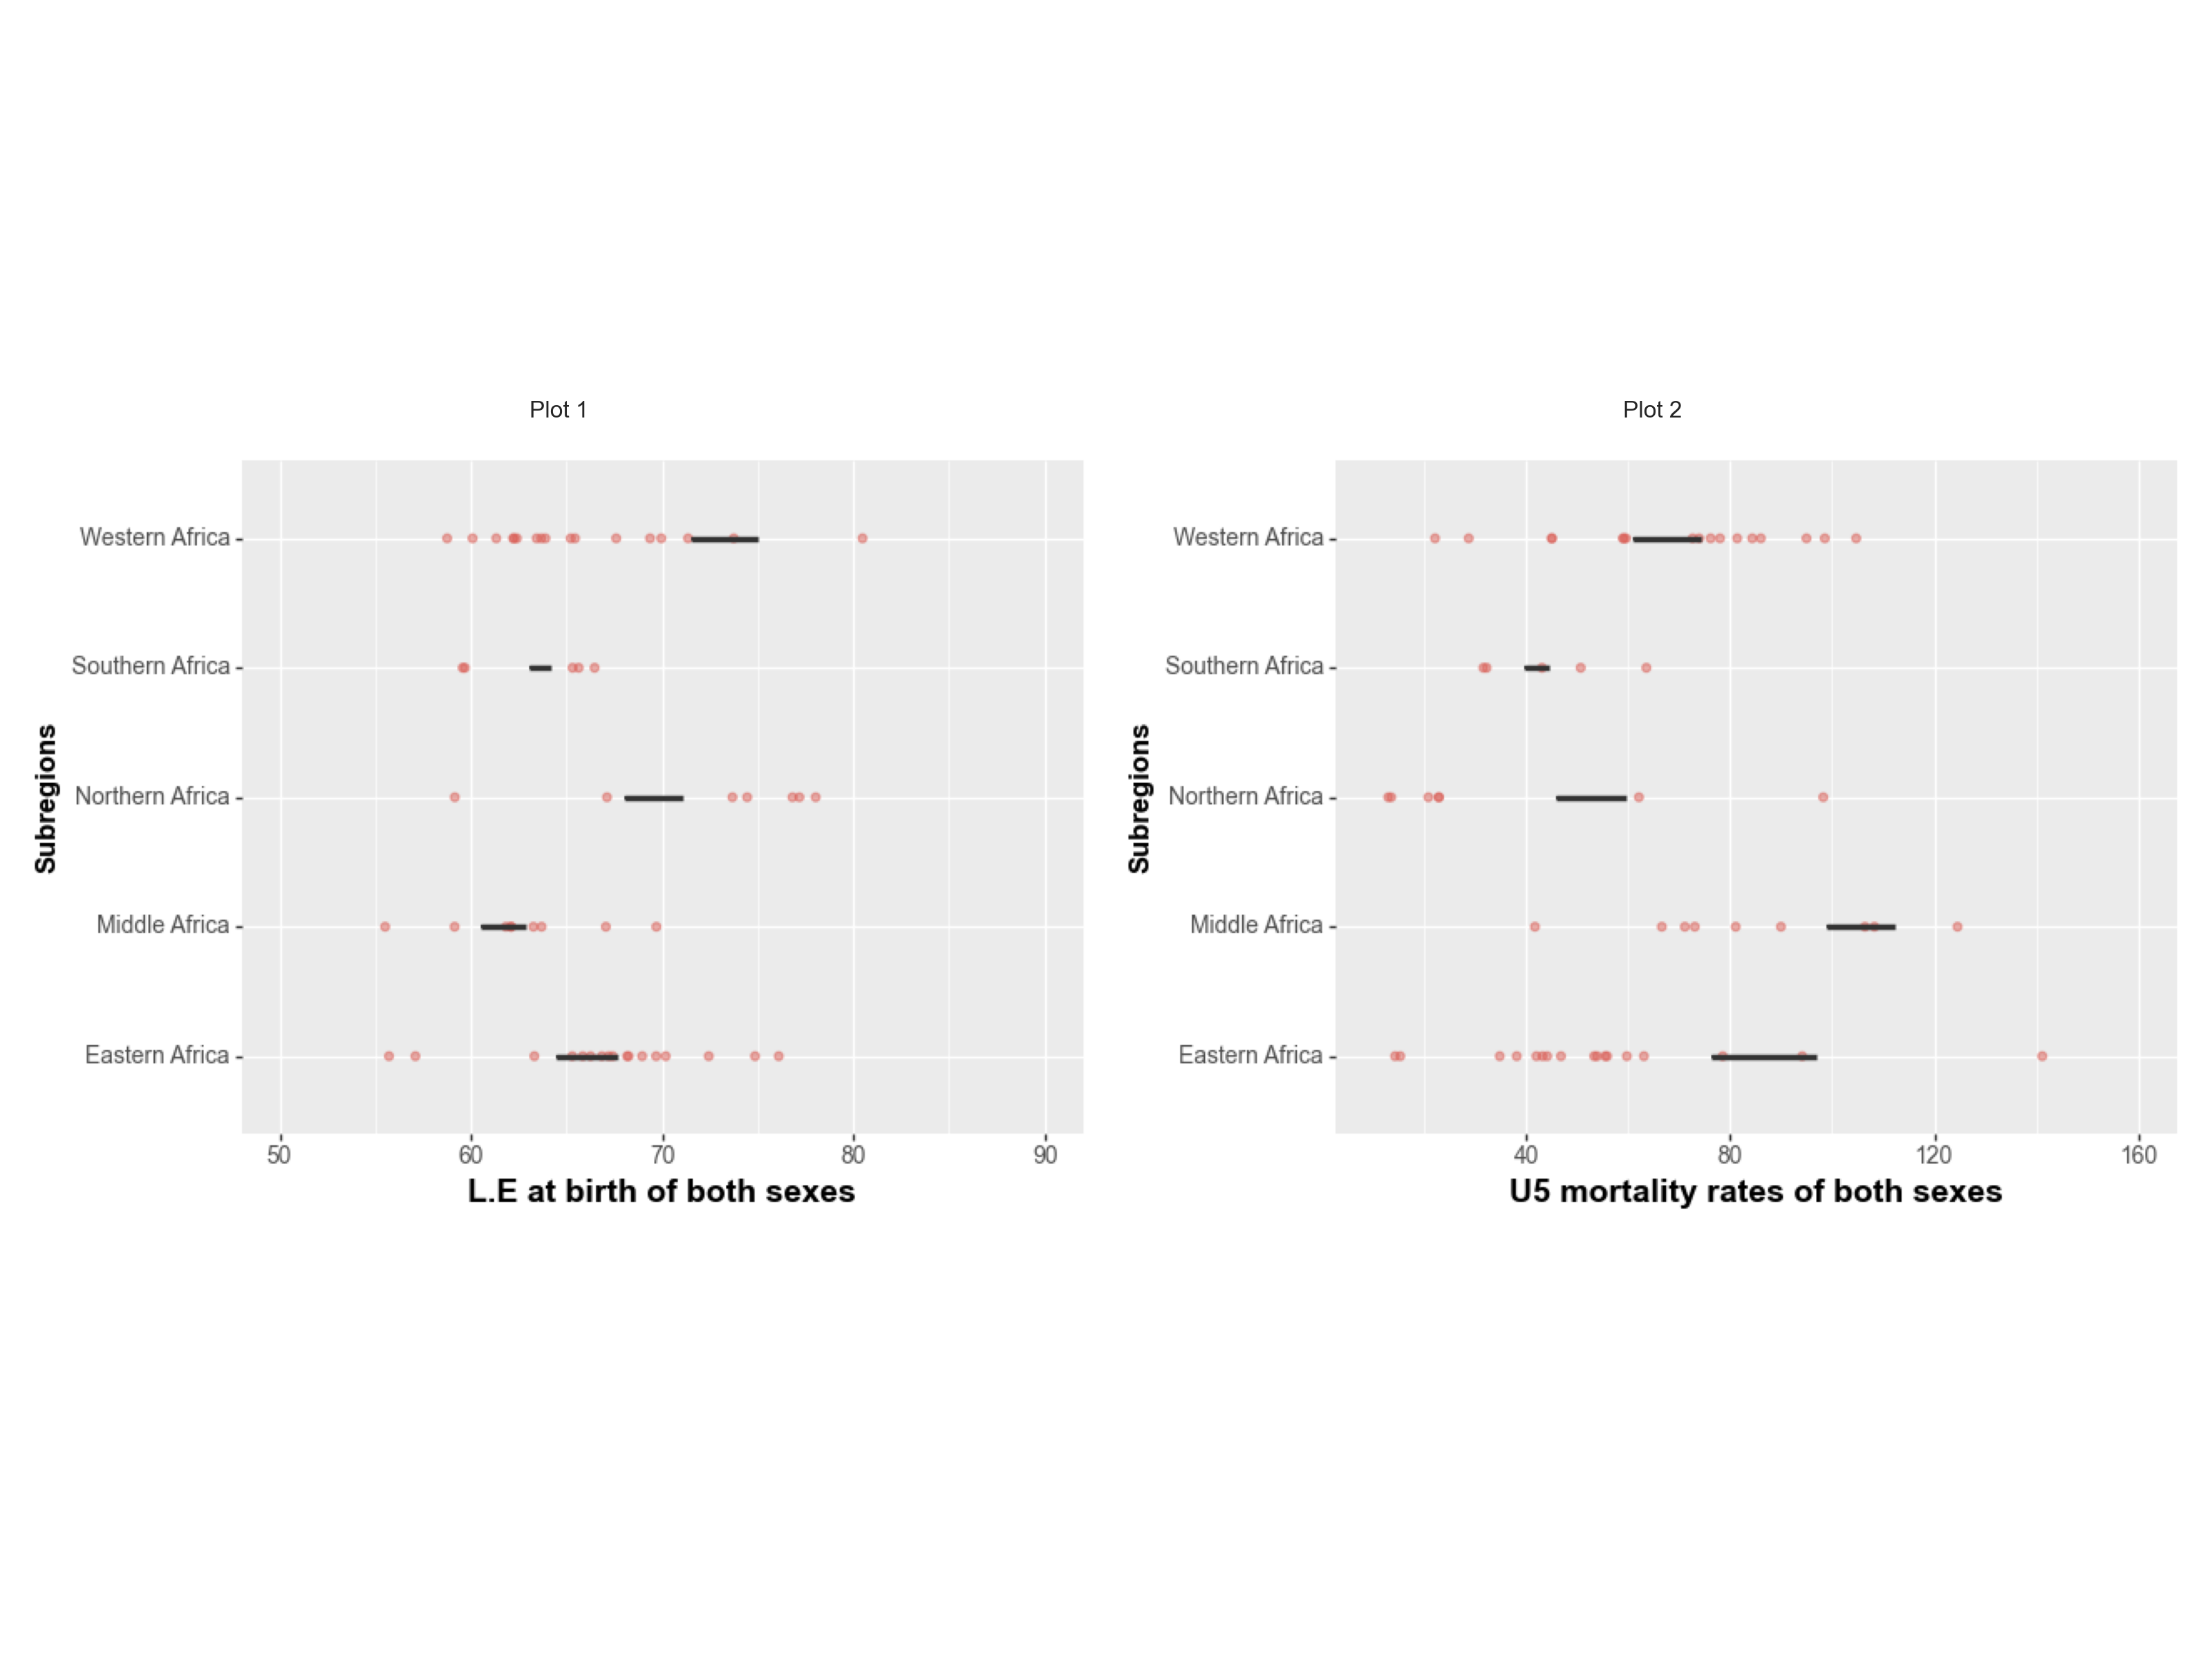

In [72]:
import matplotlib.pyplot as plt
from PIL import Image

# Save box_both_sexes and box_mortality as image files
box_both_sexes.save('box_both_sexes.png')
box_mortality.save('box_mortality.png')

# Create a grid of subplots
num_plots = 2
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Display the saved images on subplots
for i, plot in enumerate(['box_both_sexes.png', 'box_mortality.png']):
    img = Image.open(plot)
    ax = axs[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Plot {i + 1}')

# Hide any empty subplots
for i in range(num_plots, num_cols * num_rows):
    axs[i].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


## Bivariate relationships between variables using Scatterplot and Heatmap

In [133]:
#import matplotlib.pyplot as plt
# from PIL import Image

# # Save each ggplot as an image file
# plot_filenames = []
# for i, plot in enumerate(plots_list):
#     filename = f'plot_{i}.png'
#     plot.save(filename)
#     plot_filenames.append(filename)

# # Create a grid of subplots
# num_plots = len(plot_filenames)
# num_cols = 2
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# # Flatten the axes for iteration
# axs = axs.flatten()

# # Display the saved images on subplots
# for i, ax in enumerate(axs):
#     if i < num_plots:
#         img = Image.open(plot_filenames[i])
#         ax.imshow(img)
#         ax.axis('off')
#         ax.set_title(f'Plot {i + 1}')
#     else:
#         ax.axis('off')  # Hide empty subplots

# # Adjust layout and display
# plt.tight_layout()
# plt.show()

In [78]:
# # Filter data for the year 2022
# demographic_2022 = demographic[demographic['Year'] == 2022]

# # Scatter plot: Life Expectancy Females vs Under Age 5 Mortality Females
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=demographic_2022, x='Life.Expectancy.at.Birth..Females', y='Under.Age.5.Mortality..Females')
# plt.xlabel('Life Expectancy at Birth of Females')
# plt.ylabel('Under 5 Mortality Rates of Females')
# plt.title('Correlations: Life Expectancy Females vs Under 5 Mortality Females')

# # Scatter plot: Life Expectancy Females vs Under Age 5 Mortality Females
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=demographic_2022, x='Under.Age.5.Mortality..Males', y='Life.Expectancy.at.Birth..Males')
# plt.xlabel('Under 5 Mortality Rates of Males')
# plt.ylabel('Life Expectancy at Birth of Males')
# plt.title('Correlations: Life Expectancy Males vs Under 5 Mortality Males')

# # Scatter plot: Life Expectancy Both Sexes vs Under Age 5 Mortality Both Sexes
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=demographic_2022, x='Under.Age.5.Mortality..Both.Sexes', y='Life.Expectancy.at.Birth..Both.Sexes')
# plt.xlabel('Under 5 Mortality Rates of Both.Sexes')
# plt.ylabel('Life Expectancy at Birth of Both.Sexes')
# plt.title('Correlations: Life Expectancy Both Sexes vs Under 5 Mortality Both Sexes')

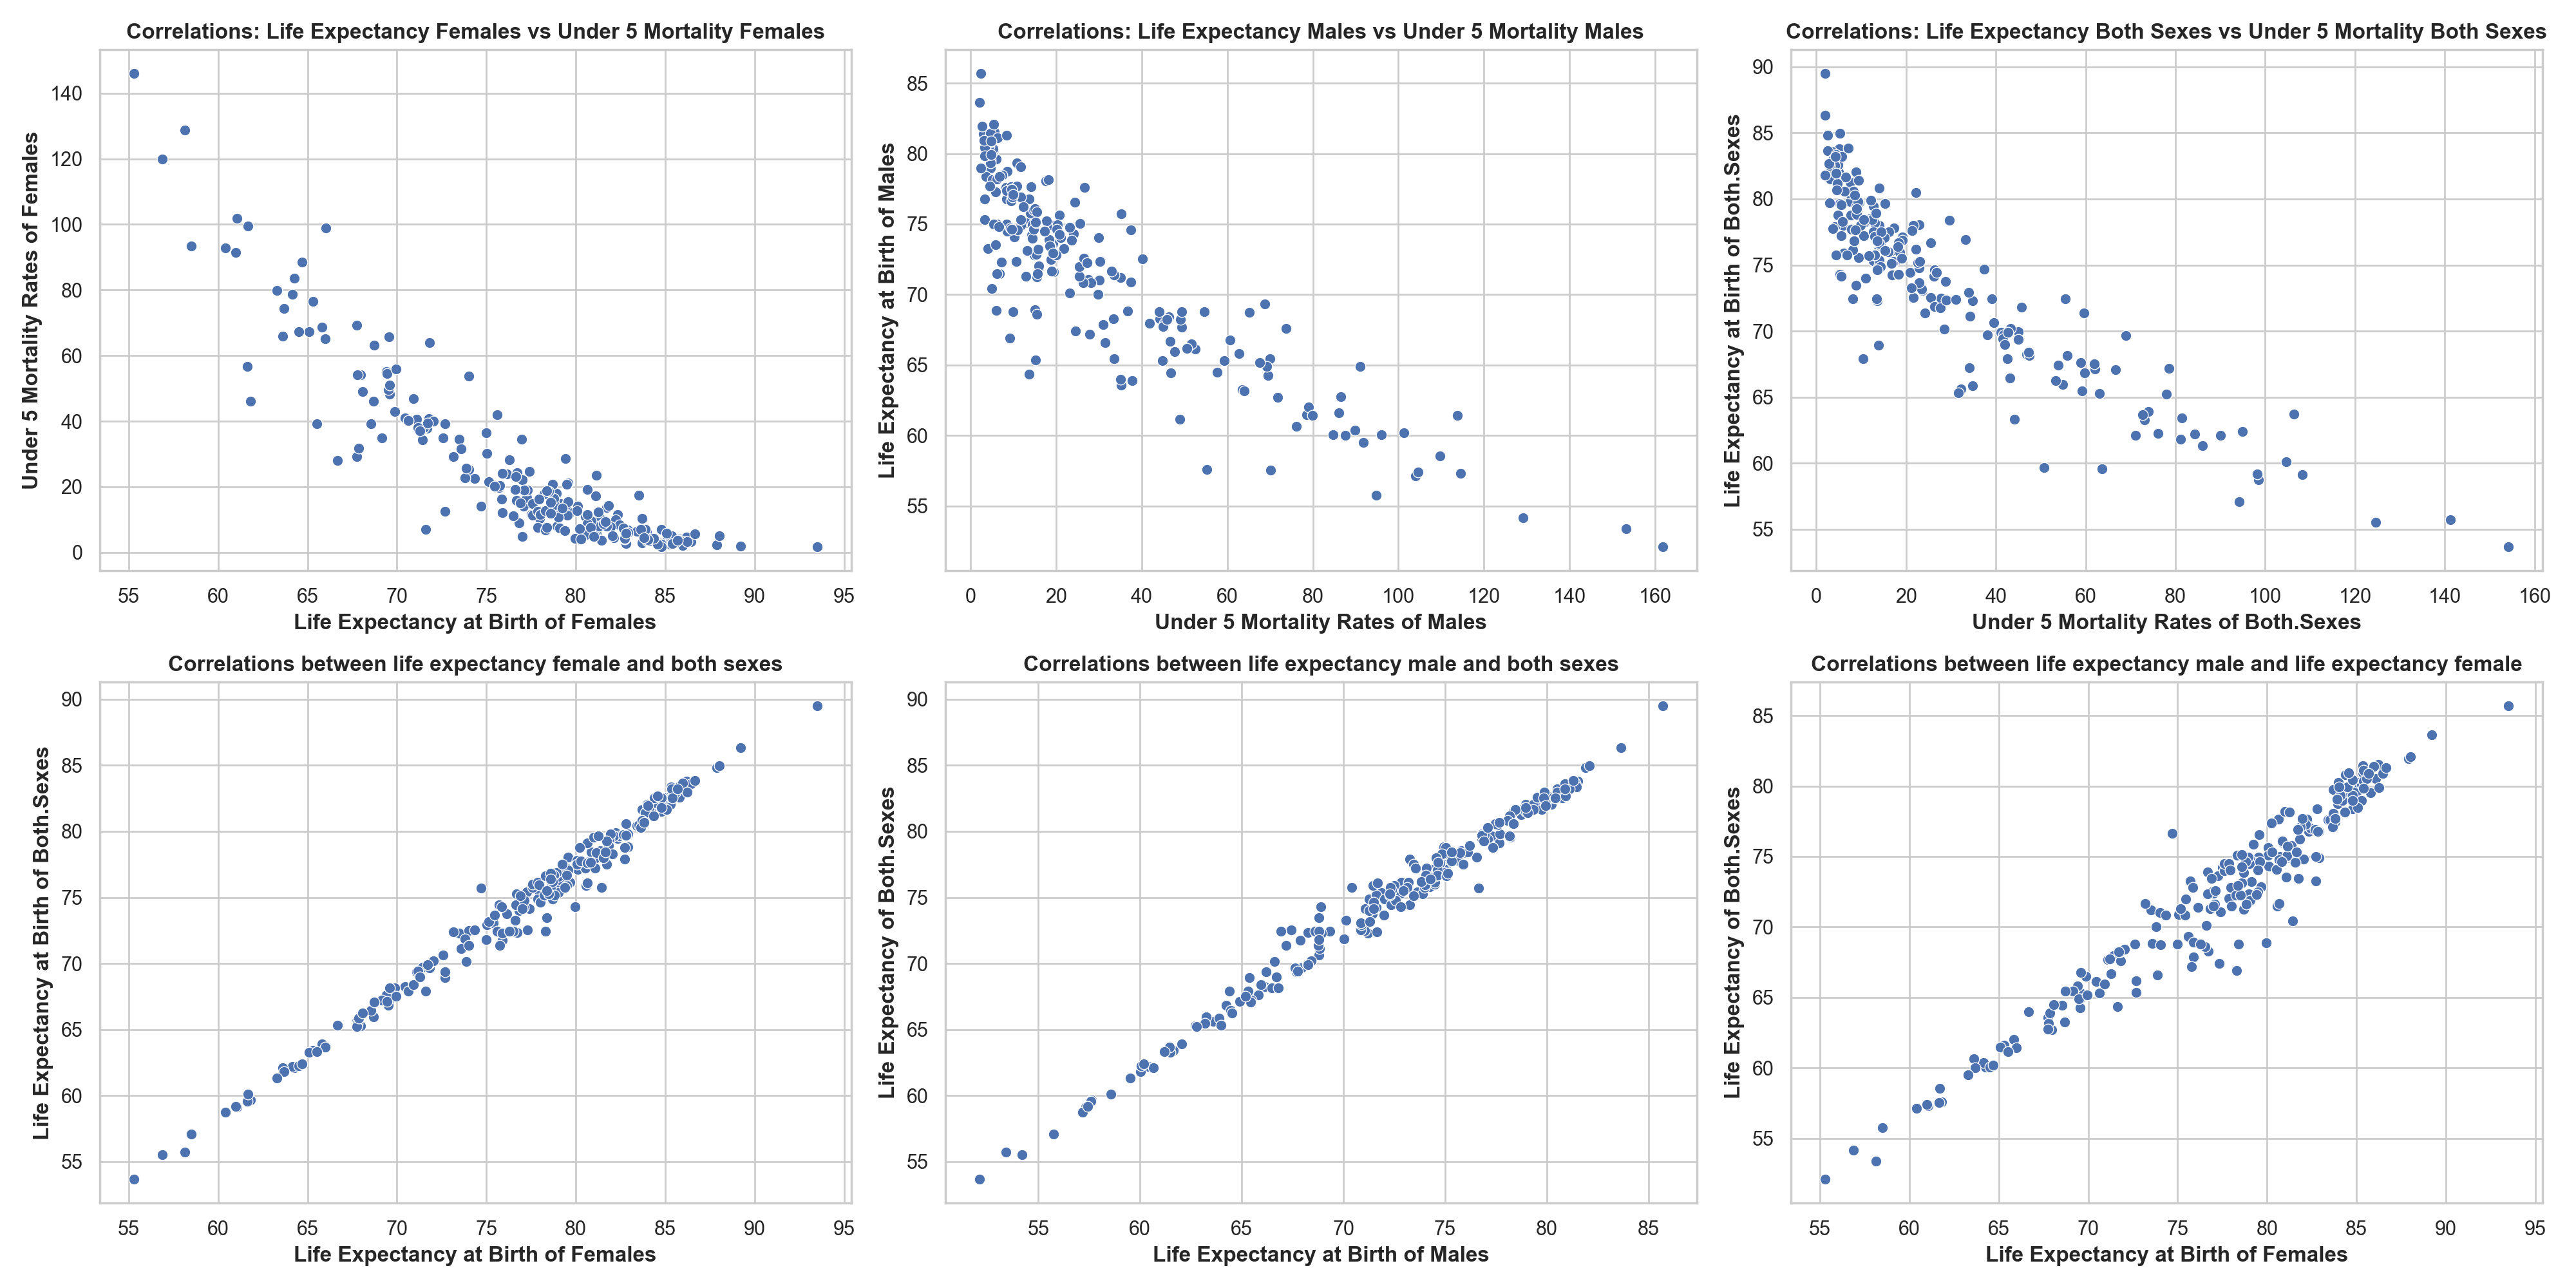

In [95]:
# Create subplots for the scatter plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Scatter plot 1: Life Expectancy Females vs Under Age 5 Mortality Females
sns.scatterplot(data=demographic_2022, x='Life.Expectancy.at.Birth..Females', y='Under.Age.5.Mortality..Females', ax=axes[0, 0])
axes[0, 0].set_xlabel('Life Expectancy at Birth of Females', fontweight='bold')
axes[0, 0].set_ylabel('Under 5 Mortality Rates of Females', fontweight='bold')
axes[0, 0].set_title('Correlations: Life Expectancy Females vs Under 5 Mortality Females', fontweight='bold')

# Scatter plot 2: Life Expectancy Males vs Under Age 5 Mortality Males
sns.scatterplot(data=demographic_2022, x='Under.Age.5.Mortality..Males', y='Life.Expectancy.at.Birth..Males', ax=axes[0, 1])
axes[0, 1].set_xlabel('Under 5 Mortality Rates of Males', fontweight='bold')
axes[0, 1].set_ylabel('Life Expectancy at Birth of Males', fontweight='bold')
axes[0, 1].set_title('Correlations: Life Expectancy Males vs Under 5 Mortality Males', fontweight='bold')

# Scatter plot 3: Life Expectancy Both Sexes vs Under Age 5 Mortality Both Sexes
sns.scatterplot(data=demographic_2022, x='Under.Age.5.Mortality..Both.Sexes', y='Life.Expectancy.at.Birth..Both.Sexes', ax=axes[0, 2])
axes[0, 2].set_xlabel('Under 5 Mortality Rates of Both.Sexes', fontweight='bold')
axes[0, 2].set_ylabel('Life Expectancy at Birth of Both.Sexes', fontweight='bold')
axes[0, 2].set_title('Correlations: Life Expectancy Both Sexes vs Under 5 Mortality Both Sexes', fontweight='bold')

# Scatter plot 4: Correlations between life expectancy female and both sexes
sns.scatterplot(data=demographic_2022, x='Life.Expectancy.at.Birth..Females', y='Life.Expectancy.at.Birth..Both.Sexes', ax=axes[1, 0])
axes[1, 0].set_xlabel('Life Expectancy at Birth of Females', fontweight='bold')
axes[1, 0].set_ylabel('Life Expectancy at Birth of Both.Sexes', fontweight='bold')
axes[1, 0].set_title('Correlations between life expectancy female and both sexes', fontweight='bold')

# Scatter plot 5: Correlations between life expectancy male and both sexes
sns.scatterplot(data=demographic_2022, x='Life.Expectancy.at.Birth..Males', y='Life.Expectancy.at.Birth..Both.Sexes', ax=axes[1, 1])
axes[1, 1].set_xlabel('Life Expectancy at Birth of Males', fontweight='bold')
axes[1, 1].set_ylabel('Life Expectancy of Both.Sexes', fontweight='bold')
axes[1, 1].set_title('Correlations between life expectancy male and both sexes', fontweight='bold')

# Scatter plot 6: Correlations between life expectancy male and life expectancy female
sns.scatterplot(data=demographic_2022, x='Life.Expectancy.at.Birth..Females', y='Life.Expectancy.at.Birth..Males', ax=axes[1, 2])
axes[1, 2].set_xlabel('Life Expectancy at Birth of Females', fontweight='bold')
axes[1, 2].set_ylabel('Life Expectancy of Both.Sexes', fontweight='bold')
axes[1, 2].set_title('Correlations between life expectancy male and life expectancy female', fontweight='bold')


# Adjust layout and display
plt.tight_layout()
plt.show()


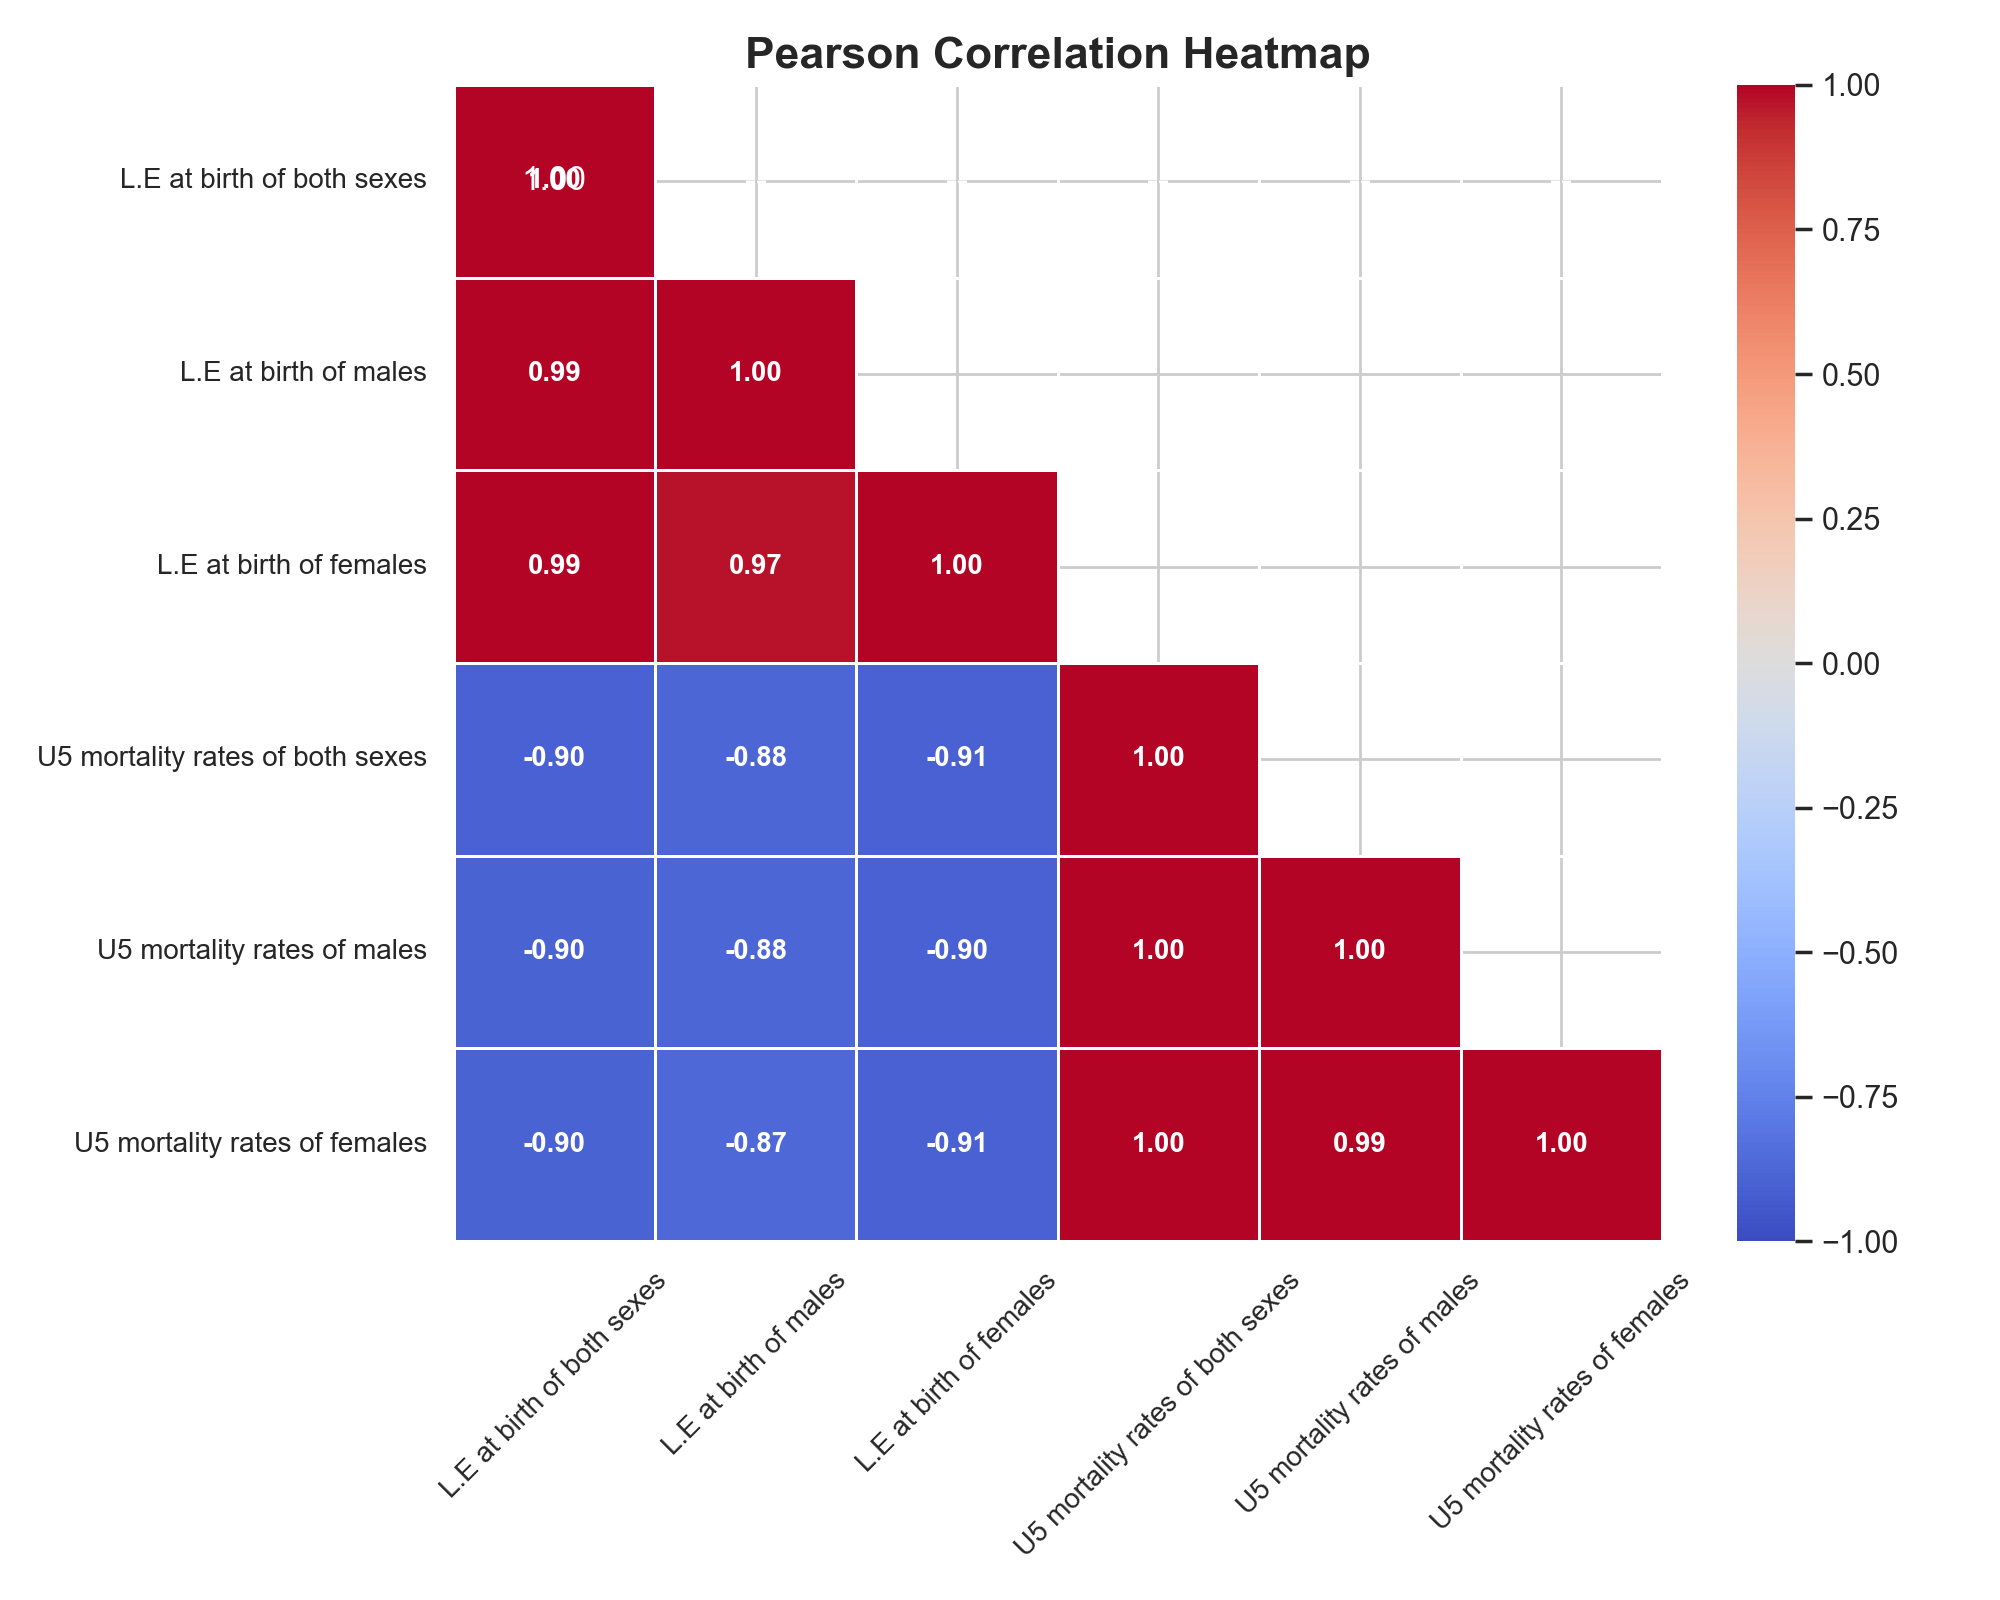

In [132]:
# Assuming Census_2022_refined is a DataFrame containing the data
# Select columns 6 to 11
Census_2022_refined = Census_2022.iloc[:, 5:11]

Census_2022_refined.columns = [
    "L.E at birth of both sexes", "L.E at birth of males", "L.E at birth of females",
    "U5 mortality rates of both sexes", "U5 mortality rates of males", "U5 mortality rates of females"
]

mask = np.triu(np.ones_like(correlations, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    mask=mask,
)
for i in range(len(correlations)):
    for j in range(len(correlations)):
        if not mask[i, j]:  # Check if it's not masked
            text_color = 'black' if mask[i, j] else 'white'
            if np.isnan(correlations.iloc[i, j]):
                text = ''
            else:
                text = f'{correlations.iloc[i, j]:.2f}'
            plt.text(j + 0.5, i + 0.5, text,
                     ha='center', va='center', color=text_color, fontsize=10, fontweight='bold')
plt.title('Pearson Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=12, fontweight='bold')
plt.ylabel('', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Data variability between 2002 and 2022

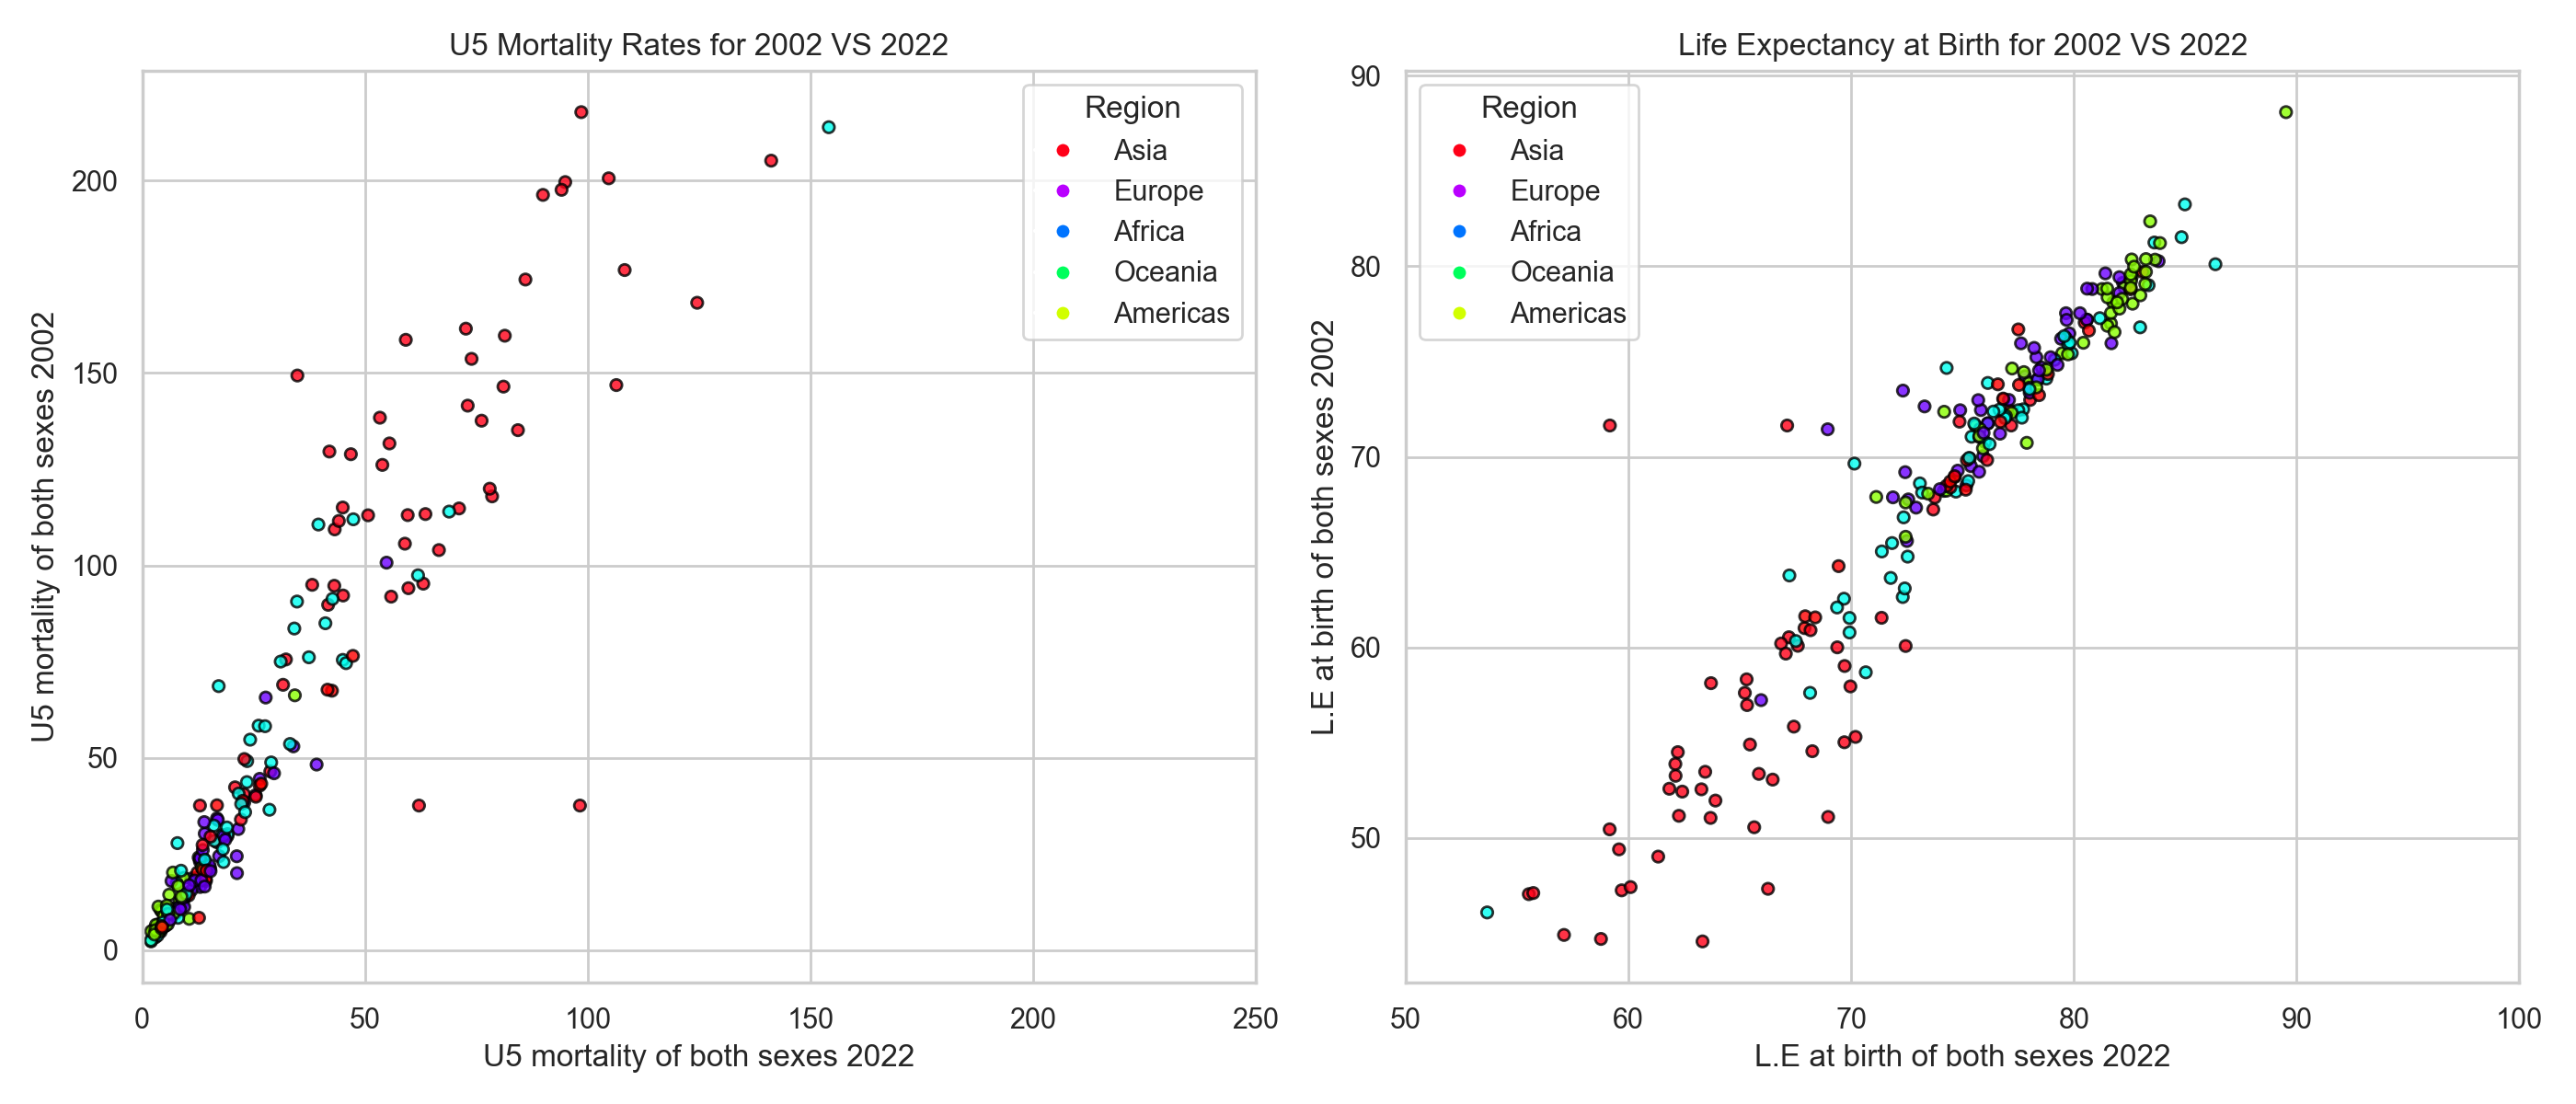

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerPathCollection

# Assuming 'demographic' is your DataFrame containing the data
data_2022 = demographic[demographic['Year'] == 2022]
data_2002 = demographic[demographic['Year'] == 2002]

# Convert categorical 'Region' values to numerical codes
region_codes = pd.Categorical(data_2022['Region'])
data_2022['Region_Code'] = region_codes.codes

region_codes = pd.Categorical(data_2002['Region'])
data_2002['Region_Code'] = region_codes.codes

# Mapping region codes to region names
#region_map = dict(enumerate(region_codes.categories))



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for U5 mortality comparison
scatter1 = axes[0].scatter(data_2022['Under.Age.5.Mortality..Both.Sexes'], data_2002['Under.Age.5.Mortality..Both.Sexes'], 
                           s=20, c=data_2022['Region_Code'], marker='o', edgecolors='black', alpha=0.8, cmap='hsv_r')

axes[0].set_xlabel('U5 mortality of both sexes 2022')
axes[0].set_ylabel('U5 mortality of both sexes 2002')
axes[0].set_xlim(0, 250)
axes[0].set_title('U5 Mortality Rates for 2002 VS 2022')

# Scatter plot for life expectancy comparison
scatter2 = axes[1].scatter(data_2022['Life.Expectancy.at.Birth..Both.Sexes'], data_2002['Life.Expectancy.at.Birth..Both.Sexes'],
                           s=20, c=data_2022['Region_Code'], marker='o', edgecolors='black', alpha=0.8, cmap='hsv_r')

axes[1].set_xlabel('L.E at birth of both sexes 2022')
axes[1].set_ylabel('L.E at birth of both sexes 2002')
axes[1].set_xlim(50, 100)
axes[1].set_title('Life Expectancy at Birth for 2002 VS 2022')

# Add custom legend with region names
regions = pd.unique(data_2022['Region'])

cmap = plt.get_cmap('hsv_r')  # Define colormap
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=region, 
                              markerfacecolor=cmap(i/len(custom_colors))) 
                   for i, region in enumerate(regions)]
axes[0].legend(handles=legend_elements, loc='upper right', title='Region')

legend_elements = [plt.Line2D([0], [1], marker='o', color='w', label=region, 
                              markerfacecolor=cmap(i/len(regions))) 
                   for i, region in enumerate(regions)]
axes[1].legend(handles=legend_elements, loc='upper left', title='Region')
# Custom legend for both years
# regions_2022 = pd.unique(data_2022['Region'])
# legend_elements_2022 = [plt.Line2D([0], [0], marker='o', color='w', label=region, 
#                                    markerfacecolor=cmap(i/len(regions_2022))) 
#                         for i, region in enumerate(regions_2022)]

# regions_2002 = pd.unique(data_2002['Region'])
# legend_elements_2002 = [plt.Line2D([0], [1], marker='o', color='w', label=region, 
#                                    markerfacecolor=cmap(i/len(regions_2002))) 
#                         for i, region in enumerate(regions_2002)]

# ax.legend(handles=legend_elements_2022 + legend_elements_2002, 
#           loc='upper right', title='Region (2022) / Region (2002)')
# # Add colorbars
# #cbar1 = plt.colorbar(scatter1, ax=axes[0], label='Region')
# #cbar2 = plt.colorbar(scatter2, ax=axes[1], label='Region')

plt.tight_layout()
plt.show()

